<a href="https://colab.research.google.com/github/uzeziogho/uzeziogho/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pylab import *

In [36]:
#Import dataset
class1= pd.read_csv('/content/train.csv')
class1.head()

class2 = pd.read_csv('/content/test.csv')
class2.head()

class3 = pd.read_csv('/content/gender_submission.csv')
class3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
# Display the number of missing values for each column
print(class1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [38]:
# Display the number of missing values for each column
print(class2.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [39]:
#Perform correlation between the variables
class1.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

In [31]:
# Calculate the number of unique values in a column
n_unique = class2['Embarked'].nunique()

# Print the result
print(f'Number of unique values in column "column_name": {n_unique}')

Number of unique values in column "column_name": 3


In [47]:
# Replace specific values in a column
class1['Sex'].replace({'male': 1.0, 'female': 0}, inplace=True)
# Replace specific values in a column
class2['Sex'].replace({'male': 1, 'female': 0}, inplace=True)

In [48]:
# Impute missing values with the mean
class1['Age'].fillna(class1['Age'].mean(), inplace=True)
class1['Age']=class1['Age'].astype(float)
# Impute missing values with the mean
class2['Age'].fillna(class2['Age'].mean(), inplace=True)
class2['Age']=class2['Age'].astype(float)
# Impute missing values with the mean
class2['Fare'].fillna(class2['Fare'].mean(), inplace=True)
class2['Fare']=class2['Fare'].astype(float)

In [32]:
class1['Embarked'].replace({'C':0,'S':1,'Q':2},inplace=True)
class2['Embarked'].replace({'C':0,'S':1,'Q':2},inplace=True)

In [50]:
#Create dependent and independent variables
X_train = class1[['Pclass','Sex','SibSp','Parch','Fare']].values
y_train = class1[['Survived']].values

X_test=class2[['Pclass','Sex','SibSp','Parch','Fare']].values
y_test=class3[['Survived']].values

In [51]:
# Display the rows that contain NaN values
print(class1[class1.isnull().any(axis=1)])


     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

     Sex        Age  SibSp  Parch      

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

In [118]:
print(predictions)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [53]:
cm=metrics.confusion_matrix(y_test,predictions)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, predictions)*100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

84.92822966507177
[[235  31]
 [ 32 120]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       266
           1       0.79      0.79      0.79       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418



In [55]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier using the training data
clf.fit(X_train, y_train.ravel())

# Make predictions on the test data
predictions = clf.predict(X_test)


In [56]:
print(predictions)
print(y_test)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 

In [57]:
cm=metrics.confusion_matrix(y_test,predictions)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, predictions)*100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

86.60287081339713
[[242  24]
 [ 32 120]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       266
           1       0.83      0.79      0.81       152

    accuracy                           0.87       418
   macro avg       0.86      0.85      0.85       418
weighted avg       0.87      0.87      0.87       418



In [60]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=0)

# Train the classifier using the training data
clf.fit(X_train, y_train.ravel())

# Make predictions on the test data
predictions = clf.predict(X_test)


In [61]:
print(predictions)
print(y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 

In [62]:
cm=metrics.confusion_matrix(y_test,predictions)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, predictions)*100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

93.77990430622009
[[259   7]
 [ 19 133]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       266
           1       0.95      0.88      0.91       152

    accuracy                           0.94       418
   macro avg       0.94      0.92      0.93       418
weighted avg       0.94      0.94      0.94       418



In [65]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
clf = LogisticRegression(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train.ravel())

# Make predictions on the test data
predictions = clf.predict(X_test)

In [66]:
print(predictions)
print(y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 

In [67]:
cm=metrics.confusion_matrix(y_test,predictions)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, predictions)*100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

98.32535885167464
[[263   3]
 [  4 148]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       266
           1       0.98      0.97      0.98       152

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [86]:
import tensorflow as tf

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

In [87]:
# Use the AdamW optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(6, ), activation='relu'))
#model.add(tf.keras.layers.Dense(16, activation='relu'))

# add a dropout layer with a rate of 0.5
model.add(tf.keras.layers.Dropout(0.5))

# add a batch normalization layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [88]:
history=model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=2,validation_data=(X_test,y_test))

Epoch 1/100
12/12 - 1s - loss: 1.0076 - accuracy: 0.4384 - val_loss: 1.4350 - val_accuracy: 0.3565 - 1s/epoch - 91ms/step
Epoch 2/100
12/12 - 0s - loss: 0.9237 - accuracy: 0.4580 - val_loss: 1.1314 - val_accuracy: 0.3565 - 31ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.9486 - accuracy: 0.4328 - val_loss: 1.0111 - val_accuracy: 0.3595 - 47ms/epoch - 4ms/step
Epoch 4/100
12/12 - 0s - loss: 0.8963 - accuracy: 0.4636 - val_loss: 0.9440 - val_accuracy: 0.3656 - 50ms/epoch - 4ms/step
Epoch 5/100
12/12 - 0s - loss: 0.8980 - accuracy: 0.4678 - val_loss: 0.8884 - val_accuracy: 0.3535 - 29ms/epoch - 2ms/step
Epoch 6/100
12/12 - 0s - loss: 0.8581 - accuracy: 0.4832 - val_loss: 0.8514 - val_accuracy: 0.3535 - 31ms/epoch - 3ms/step
Epoch 7/100
12/12 - 0s - loss: 0.8600 - accuracy: 0.4650 - val_loss: 0.8266 - val_accuracy: 0.3595 - 30ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.8631 - accuracy: 0.4678 - val_loss: 0.7968 - val_accuracy: 0.3927 - 29ms/epoch - 2ms/step
Epoch 9/100
12/12

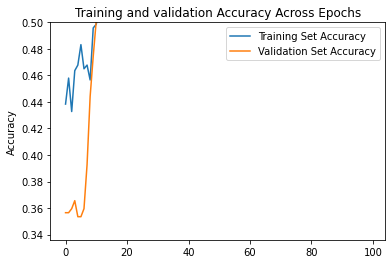

In [89]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']

plt.plot(accuracy,label='Training Set Accuracy')
plt.plot(validation_accuracy,label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.5])
plt.title('Training and validation Accuracy Across Epochs')
plt.legend()

In [91]:
predictions=model.predict(X_test)
predictions=predictions.argmax(axis=1)

11/11 [==============================] - 0s 1ms/step


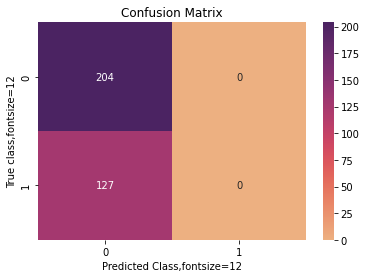

In [93]:
cm=metrics.confusion_matrix(y_test,predictions)

ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class,fontsize=12")
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()